In [23]:
import requests
import lxml.html
import time
import pandas as pd
!pip install lxml
!pip install cssselect

In [ ]:
session = requests.Session()
response = session.get('https://npb.jp/bis/teams/')
response.content

In [30]:
root = lxml.html.fromstring(response.content)
root.make_links_absolute(response.url)#絶対パスに変換

for a in root.cssselect('#team_list a'):
    url = a.get('href')
    print(url)

In [33]:
response = session.get('https://npb.jp/bis/teams/rst_g.html')
root = lxml.html.fromstring(response.content)
root.make_links_absolute(response.url)

for a in root.cssselect('td.rosterRegister a'):
    url = a.get('href')
    print(url)


https://npb.jp/bis/players/21825153.html
https://npb.jp/bis/players/93795138.html
https://npb.jp/bis/players/83385151.html
https://npb.jp/bis/players/11515115.html
https://npb.jp/bis/players/41745137.html
https://npb.jp/bis/players/03305153.html
https://npb.jp/bis/players/41045138.html
https://npb.jp/bis/players/61165137.html
https://npb.jp/bis/players/81285118.html
https://npb.jp/bis/players/31335135.html
https://npb.jp/bis/players/41945139.html
https://npb.jp/bis/players/51555137.html
https://npb.jp/bis/players/21525151.html
https://npb.jp/bis/players/31935132.html
https://npb.jp/bis/players/81285132.html
https://npb.jp/bis/players/33935134.html
https://npb.jp/bis/players/31635134.html
https://npb.jp/bis/players/31735136.html
https://npb.jp/bis/players/61965138.html
https://npb.jp/bis/players/93795151.html
https://npb.jp/bis/players/21225130.html
https://npb.jp/bis/players/91095134.html
https://npb.jp/bis/players/11215138.html
https://npb.jp/bis/players/91395153.html
https://npb.jp/b

In [39]:
response = session.get('https://npb.jp/bis/players/71775139.html')
root = lxml.html.fromstring(response.content)
keys = root.cssselect('#tablefix_p thead tr th')
keys_string = [key.text for key in keys]
keys_string

['年度',
 '所属球団',
 '登板',
 '勝利',
 '敗北',
 'セーブ',
 'H',
 'HP',
 '完投',
 '完封勝',
 '無四球',
 '勝率',
 '打者',
 '投球回',
 '安打',
 '本塁打',
 '四球',
 '死球',
 '三振',
 '暴投',
 'ボーク',
 '失点',
 '自責点',
 '防御率']

In [41]:
values = root.cssselect('#tablefix_p tbody tr.registerStats')[-1]
values

<Element tr at 0x7ff8df9e37c0>

In [45]:
record = {keys[i].text: values[i].text.strip() for i in range(len(keys))}
record

{'年度': '2021',
 '所属球団': '広島東洋',
 '登板': '25',
 '勝利': '13',
 '敗北': '9',
 'セーブ': '0',
 'H': '0',
 'HP': '0',
 '完投': '2',
 '完封勝': '0',
 '無四球': '1',
 '勝率': '.591',
 '打者': '647',
 '投球回': '',
 '安打': '150',
 '本塁打': '18',
 '四球': '51',
 '死球': '8',
 '三振': '102',
 '暴投': '4',
 'ボーク': '1',
 '失点': '73',
 '自責点': '63',
 '防御率': '3.81'}

In [48]:
name = root.cssselect('#pc_v_name #pc_v_name')
name[0].text.strip()

'九里\u3000亜蓮'

In [55]:
inning = root.cssselect('#tablefix_p tbody tr.registerStats table.table_inning tbody tr th')[-1]
inning.text

'149'

In [58]:
record['名前'] = name[0].text.strip()
record['投球回'] = inning.text
record

{'年度': '2021',
 '所属球団': '広島東洋',
 '登板': '25',
 '勝利': '13',
 '敗北': '9',
 'セーブ': '0',
 'H': '0',
 'HP': '0',
 '完投': '2',
 '完封勝': '0',
 '無四球': '1',
 '勝率': '.591',
 '打者': '647',
 '投球回': '149',
 '安打': '150',
 '本塁打': '18',
 '四球': '51',
 '死球': '8',
 '三振': '102',
 '暴投': '4',
 'ボーク': '1',
 '失点': '73',
 '自責点': '63',
 '防御率': '3.81',
 '名前': '九里\u3000亜蓮',
 'inning': '149'}

In [62]:
import requests
import time
import lxml.html
import pandas as pd

def main():
    session = requests.Session()
    response = session.get('https://npb.jp/bis/teams/')
    team_urls = scrape_team_page(response)

    df = pd.DataFrame()

    for team_url in team_urls:
        response = session.get(team_url)
        player_urls = scrape_player_page(response)

        for player_url in player_urls:
            time.sleep(1)
            response = session.get(player_url)
            record = scrape_detail_info(response)

            if record:
                print(record)
                series = pd.Series(record)
                df = df.append(series, ignore_index=True)

    df.to_csv('player_records.csv', index=False)

def scrape_team_page(response):
    root = lxml.html.fromstring(response.content)
    root.make_links_absolute(response.url)

    for a in root.cssselect('#team_list a'):
        url = a.get('href')
        yield url

def scrape_player_page(response):
    root = lxml.html.fromstring(response.content)
    root.make_links_absolute(response.url)

    for a in root.cssselect('td.rosterRegister a'):
        url = a.get('href')
        yield url

def scrape_detail_info(response):
    root = lxml.html.fromstring(response.content)

    try:
        keys = root.cssselect('#tablefix_p thead tr th')
        values = root.cssselect('#tablefix_p tbody tr.registerStats')[-1]
        name = root.cssselect('#pc_v_name #pc_v_name')
        inning = root.cssselect('#tablefix_p tbody tr.registerStats table.table_inning tbody tr th')[-1]
    except:
        print('no data')

    if not keys == []:
        record = {keys[i].text: values[i].text.strip() for i in range(len(keys))}
        record['名前'] = name[0].text.strip()
        record['投球回'] = inning.text

        return record

if __name__ == '__main__':
    main()


{'年度': '2021', '所属球団': '読\u3000売', '登板': '3', '勝利': '0', '敗北': '1', 'セーブ': '0', 'H': '0', 'HP': '0', '完投': '0', '完封勝': '0', '無四球': '0', '勝率': '.000', '打者': '24', '投球回': '5', '安打': '8', '本塁打': '2', '四球': '2', '死球': '0', '三振': '5', '暴投': '0', 'ボーク': '0', '失点': '8', '自責点': '8', '防御率': '14.40', '名前': '平内\u3000龍太'}
{'年度': '2021', '所属球団': '読\u3000売', '登板': '46', '勝利': '1', '敗北': '0', 'セーブ': '7', 'H': '13', 'HP': '14', '完投': '0', '完封勝': '0', '無四球': '0', '勝率': '1.000', '打者': '175', '投球回': '41', '安打': '38', '本塁打': '3', '四球': '12', '死球': '2', '三振': '34', '暴投': '1', 'ボーク': '0', '失点': '15', '自責点': '13', '防御率': '2.83', '名前': 'Ｒ．デラロサ'}
{'年度': '2021', '所属球団': '読\u3000売', '登板': '14', '勝利': '5', '敗北': '5', 'セーブ': '0', 'H': '0', 'HP': '0', '完投': '0', '完封勝': '0', '無四球': '0', '勝率': '.500', '打者': '317', '投球回': '73', '安打': '82', '本塁打': '13', '四球': '23', '死球': '3', '三振': '54', '暴投': '2', 'ボーク': '1', '失点': '40', '自責点': '38', '防御率': '4.68', '名前': 'Ａ．サンチェス'}
{'年度': '2021', '所属球団': '読\u3000売', '登板': '4', '勝利': '

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [112]:
df = pd.read_csv('player_records.csv')
df.head()


,H,HP,セーブ,ボーク,三振,勝利,勝率,名前,四球,失点,...,打者,投球回,敗北,暴投,本塁打,死球,無四球,登板,自責点,防御率
0,0,0,0,0,5,0,0.000,平内 龍太,2,8,...,24,5.0,1,0,2,0,0,3,8,14.40
1,13,14,7,0,34,1,1.000,Ｒ．デラロサ,12,15,...,175,41.0,0,1,3,2,0,46,13,2.83
2,0,0,0,1,54,5,0.500,Ａ．サンチェス,23,40,...,317,73.0,5,2,13,3,0,14,38,4.68
3,1,1,0,0,0,0,0.000,大竹 寛,0,1,...,11,2.0,0,0,0,0,0,4,1,3.86
4,0,0,0,0,102,6,0.462,菅野 智之,25,41,...,465,115.0,7,1,15,7,0,19,41,3.19


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   H       414 non-null    int64  
 1   HP      414 non-null    int64  
 2   セーブ     414 non-null    int64  
 3   ボーク     414 non-null    int64  
 4   三振      414 non-null    int64  
 5   勝利      414 non-null    int64  
 6   勝率      414 non-null    float64
 7   名前      414 non-null    object 
 8   四球      414 non-null    int64  
 9   失点      414 non-null    int64  
 10  安打      414 non-null    int64  
 11  完封勝     414 non-null    int64  
 12  完投      414 non-null    int64  
 13  年度      414 non-null    int64  
 14  所属球団    414 non-null    object 
 15  打者      414 non-null    int64  
 16  投球回     411 non-null    float64
 17  敗北      414 non-null    int64  
 18  暴投      414 non-null    int64  
 19  本塁打     414 non-null    int64  
 20  死球      414 non-null    int64  
 21  無四球     414 non-null    int64  
 22  登板

In [117]:
columns_list = ['年度', '所属球団', '登板', '勝利', '敗北', 'セーブ', 'H', 'HP', 
                '完投', '完封勝', '無四球', '勝率', '打者', '投球回', '安打', '本塁打', 
                '四球', '死球', '三振', '暴投', 'ボーク', '失点', '自責点', '防御率', '名前']
df = df.loc[:,columns_list]


7

In [118]:
df['防御率'] = pd.to_numeric(df['防御率'],errors='coerce')
df.dropna(inplace=True)

In [119]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples



In [120]:
df = df[df['年度'] == 2021]

data_df = df.drop(columns=['年度','所属球団','名前'])
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_df)
data = np.array(data_df)
data_scaled = np.array(data_scaled)

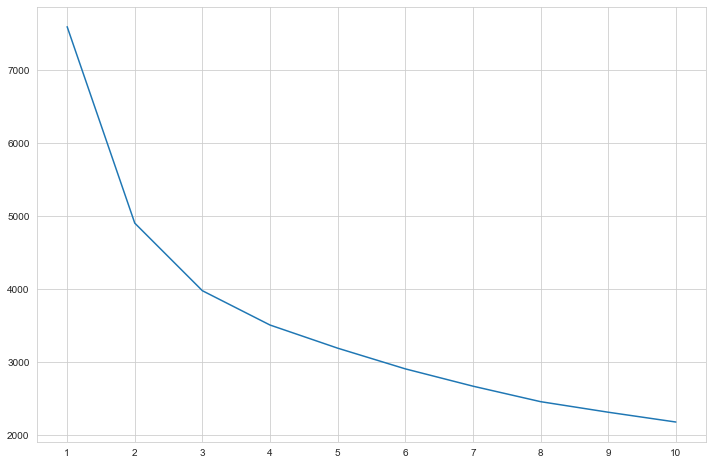

In [121]:
distortions = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(data_scaled)
    distortions.append(kmeans.inertia_)

fig = plt.figure(figsize=(12,8))
plt.xticks(range(1,11))
plt.plot(range(1,11),distortions)


In [122]:
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=100)
kmeans.fit(data_scaled)
cluster_labels = kmeans.predict(data_scaled)

In [127]:
pd.set_option('display.max_columns',30)
df['cluster'] = cluster_labels
df


,年度,所属球団,登板,勝利,敗北,セーブ,H,HP,完投,完封勝,無四球,勝率,打者,投球回,安打,本塁打,四球,死球,三振,暴投,ボーク,失点,自責点,防御率,名前,cluster
0,2021,読 売,3,0,1,0,0,0,0,0,0,0.000,24,5.0,8,2,2,0,5,0,0,8,8,14.40,平内 龍太,0
1,2021,読 売,46,1,0,7,13,14,0,0,0,1.000,175,41.0,38,3,12,2,34,1,0,15,13,2.83,Ｒ．デラロサ,2
2,2021,読 売,14,5,5,0,0,0,0,0,0,0.500,317,73.0,82,13,23,3,54,2,1,40,38,4.68,Ａ．サンチェス,3
3,2021,読 売,4,0,0,0,1,1,0,0,0,0.000,11,2.0,5,0,0,0,0,0,0,1,1,3.86,大竹 寛,0
4,2021,読 売,19,6,7,0,0,0,2,1,0,0.462,465,115.0,90,15,25,7,102,1,0,41,41,3.19,菅野 智之,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,2021,オリックス,9,2,2,0,0,0,0,0,0,0.500,169,39.0,32,1,20,5,29,0,0,16,16,3.69,山﨑 颯一郎,0
408,2021,オリックス,34,2,2,2,4,6,0,0,0,0.500,148,35.0,30,4,14,1,23,1,0,13,12,3.03,漆原 大晟,0
409,2021,オリックス,18,1,1,0,4,5,0,0,0,0.500,62,17.0,7,3,4,0,17,0,0,5,4,2.12,吉田 凌,0
410,2021,オリックス,11,0,0,0,0,0,0,0,0,0.000,45,10.0,9,4,5,2,10,1,0,10,10,9.00,鈴木 優,0


In [151]:
pd.set_option('display.max_rows',1000)
df[df['cluster'] == 0]


,年度,所属球団,登板,勝利,敗北,セーブ,H,HP,完投,完封勝,無四球,勝率,打者,投球回,安打,本塁打,四球,死球,三振,暴投,ボーク,失点,自責点,防御率,名前,cluster
0,2021,読 売,3,0,1,0,0,0,0,0,0,0.000,24,5.0,8,2,2,0,5,0,0,8,8,14.40,平内 龍太,0
3,2021,読 売,4,0,0,0,1,1,0,0,0,0.000,11,2.0,5,0,0,0,0,0,0,1,1,3.86,大竹 寛,0
6,2021,読 売,5,0,1,0,0,0,0,0,0,0.000,26,5.0,11,3,1,0,5,0,0,8,8,14.40,井納 翔一,0
7,2021,読 売,9,0,1,1,4,4,0,0,0,0.000,63,16.0,8,1,6,0,15,0,0,3,3,1.65,野上 亮磨,0
20,2021,読 売,4,0,1,1,0,0,0,0,0,0.000,51,11.0,15,1,4,2,4,0,0,6,6,4.91,直江 大輔,0
21,2021,読 売,15,1,0,0,1,2,0,0,0,1.000,81,18.0,22,1,7,0,15,0,0,9,9,4.42,高木 京介,0
22,2021,読 売,39,0,0,0,2,2,0,0,0,0.000,152,38.0,22,5,20,1,37,3,0,13,12,2.84,田中 豊樹,0
23,2021,読 売,2,0,1,0,0,0,0,0,0,0.000,37,8.0,9,2,2,0,9,0,0,4,3,3.38,横川 凱,0
24,2021,読 売,1,0,0,0,0,0,0,0,0,0.000,11,2.0,3,1,3,1,0,0,0,4,4,18.00,古川 侑利,0
26,2021,読 売,3,0,0,0,0,0,0,0,0,0.000,12,3.0,3,0,1,0,0,0,0,0,0,0.00,戸田 懐生,0


In [131]:
df[df['cluster'] == 1]

,年度,所属球団,登板,勝利,敗北,セーブ,H,HP,完投,完封勝,無四球,勝率,打者,投球回,安打,本塁打,四球,死球,三振,暴投,ボーク,失点,自責点,防御率,名前,cluster
4,2021,読 売,19,6,7,0,0,0,2,1,0,0.462,465,115.0,90,15,25,7,102,1,0,41,41,3.19,菅野 智之,1
5,2021,読 売,26,9,8,0,0,0,1,0,0,0.529,639,151.0,130,19,58,6,138,3,0,75,72,4.27,戸郷 翔征,1
16,2021,読 売,27,11,9,0,0,0,0,0,0,0.550,598,140.0,125,18,61,2,76,2,0,57,53,3.39,髙橋 優貴,1
41,2021,阪 神,23,10,7,0,1,1,1,0,0,0.588,557,140.0,119,15,34,3,79,1,0,42,38,2.44,伊藤 将司,1
56,2021,阪 神,25,13,6,0,0,0,0,0,0,0.684,651,156.0,143,11,48,3,104,0,0,48,43,2.48,青柳 晃洋,1
70,2021,中 日,25,8,10,0,0,0,0,0,0,0.444,615,143.0,141,16,51,4,115,4,0,60,58,3.64,小笠原 慎之介,1
107,2021,横浜DeNA,22,6,7,0,0,0,0,0,0,0.462,499,112.0,137,9,30,3,106,3,0,57,54,4.34,大貫 晋一,1
114,2021,横浜DeNA,17,5,7,0,0,0,1,1,0,0.417,387,91.0,73,8,52,3,84,5,0,42,40,3.94,濵口 遥大,1
140,2021,広島東洋,23,10,5,0,0,0,1,1,0,0.667,600,146.0,136,12,31,5,102,1,0,57,50,3.07,大瀬良 大地,1
143,2021,広島東洋,24,8,7,0,0,0,1,1,0,0.533,672,163.0,144,16,52,3,132,6,0,55,54,2.98,森下 暢仁,1


In [153]:
pd.set_option('display.max_rows',1000)
df[df['cluster'] == 2]



,年度,所属球団,登板,勝利,敗北,セーブ,H,HP,完投,完封勝,無四球,勝率,打者,投球回,安打,本塁打,四球,死球,三振,暴投,ボーク,失点,自責点,防御率,名前,cluster
1,2021,読 売,46,1,0,7,13,14,0,0,0,1.000,175,41.0,38,3,12,2,34,1,0,15,13,2.83,Ｒ．デラロサ,2
10,2021,読 売,59,3,0,1,15,18,0,0,0,1.000,182,42.0,39,5,18,0,30,1,0,19,15,3.19,鍵谷 陽平,2
11,2021,読 売,29,1,0,0,6,7,0,0,0,1.000,145,33.0,35,7,16,1,20,4,0,20,20,5.40,桜井 俊貴,2
12,2021,読 売,58,4,3,1,25,29,0,0,0,0.571,220,54.0,47,2,10,5,49,0,0,17,15,2.47,中川 皓太,2
19,2021,読 売,55,2,2,1,20,22,0,0,0,0.500,171,39.0,34,2,21,5,47,2,0,17,16,3.69,高梨 雄平,2
25,2021,読 売,47,0,0,0,13,13,0,0,0,0.000,145,33.0,29,2,17,2,23,0,0,16,15,4.09,大江 竜聖,2
32,2021,阪 神,62,3,4,1,41,44,0,0,0,0.429,230,57.0,47,6,15,0,51,3,0,21,17,2.65,岩崎 優,2
36,2021,阪 神,46,4,0,0,12,16,0,0,0,1.000,174,38.0,42,4,14,3,33,1,0,21,20,4.66,岩貞 祐太,2
37,2021,阪 神,44,3,0,0,10,13,0,0,0,1.000,198,47.0,43,5,17,0,39,0,0,23,20,3.80,馬場 皐輔,2
47,2021,阪 神,39,2,3,0,10,12,0,0,0,0.400,169,39.0,31,4,24,2,38,4,0,18,16,3.69,及川 雅貴,2


In [133]:
df[df['cluster']== 3]

,年度,所属球団,登板,勝利,敗北,セーブ,H,HP,完投,完封勝,無四球,勝率,打者,投球回,安打,本塁打,四球,死球,三振,暴投,ボーク,失点,自責点,防御率,名前,cluster
2,2021,読 売,14,5,5,0,0,0,0,0,0,0.500,317,73.0,82,13,23,3,54,2,1,40,38,4.68,Ａ．サンチェス,3
8,2021,読 売,17,3,4,0,0,1,1,1,0,0.429,274,63.0,66,5,22,3,59,0,0,21,19,2.71,今村 信貴,3
9,2021,東京ヤクルト,33,5,9,0,4,5,0,0,0,0.357,449,100.0,126,10,28,2,81,1,0,59,45,4.02,田口 麗斗,3
13,2021,読 売,17,7,5,0,0,0,0,0,0,0.583,369,86.0,96,5,22,5,74,0,1,36,36,3.77,Ｃ．Ｃ．メルセデス,3
14,2021,読 売,52,4,3,1,11,13,0,0,0,0.571,390,96.0,83,13,25,4,97,2,1,37,33,3.07,畠 世周,3
18,2021,読 売,29,2,0,1,0,2,0,0,0,1.000,161,37.0,25,4,24,3,36,3,0,20,20,4.82,戸根 千明,3
29,2021,読 売,15,2,8,0,0,0,0,0,0,0.200,337,78.0,66,6,37,3,83,0,0,34,31,3.56,山口 俊,3
38,2021,阪 神,21,3,3,0,4,5,0,0,0,0.500,238,48.0,47,4,40,4,52,8,1,29,28,5.21,藤浪 晋太郎,3
52,2021,阪 神,24,3,3,0,6,7,0,0,0,0.500,243,59.0,55,6,14,0,48,3,0,25,23,3.49,Ｒ．アルカンタラ,3
55,2021,阪 神,20,9,3,0,0,0,0,0,0,0.750,465,113.0,99,10,24,3,87,0,0,39,37,2.95,Ｊ．ガンケル,3


In [134]:
df[df['cluster']==4]

,年度,所属球団,登板,勝利,敗北,セーブ,H,HP,完投,完封勝,無四球,勝率,打者,投球回,安打,本塁打,四球,死球,三振,暴投,ボーク,失点,自責点,防御率,名前,cluster
17,2021,読 売,56,0,3,19,1,1,0,0,0,0.000,228,55.0,38,3,26,1,64,0,0,18,18,2.93,Ｔ．ビエイラ,4
64,2021,阪 神,62,1,1,42,0,1,0,0,0,0.500,229,62.0,40,0,8,0,58,1,0,9,8,1.16,Ｒ．スアレス,4
100,2021,中 日,49,1,4,23,0,1,0,0,0,0.200,178,48.0,26,1,10,1,59,1,1,11,11,2.06,Ｒ．マルティネス,4
108,2021,横浜DeNA,59,3,5,23,1,4,0,0,0,0.375,246,57.0,66,8,12,0,57,3,0,31,26,4.08,三嶋 一輝,4
145,2021,広島東洋,53,0,1,37,0,0,0,0,0,0.000,201,52.0,23,1,28,1,81,1,1,5,5,0.86,栗林 良吏,4
188,2021,東京ヤクルト,66,3,2,31,14,17,0,0,0,0.600,259,64.0,43,7,23,3,76,3,0,19,18,2.52,Ｓ．マクガフ,4
264,2021,千葉ロッテ,67,3,6,38,0,3,0,0,0,0.333,248,64.0,43,5,15,0,68,2,0,17,16,2.24,益田 直也,4
311,2021,東北楽天,43,0,2,24,0,0,0,0,0,0.000,172,43.0,22,1,21,1,59,1,0,3,3,0.63,松井 裕樹,4
371,2021,北海道日本ハム,56,3,3,28,1,4,0,0,0,0.500,221,54.0,34,9,24,1,69,4,0,18,18,2.96,杉浦 稔大,4
381,2021,オリックス,46,1,3,29,3,4,0,0,0,0.250,163,43.0,30,4,9,0,37,1,0,11,11,2.30,平野 佳寿,4


In [142]:
df[df['cluster'] == 5]

,年度,所属球団,登板,勝利,敗北,セーブ,H,HP,完投,完封勝,無四球,勝率,打者,投球回,安打,本塁打,四球,死球,三振,暴投,ボーク,失点,自責点,防御率,名前,cluster
35,2021,阪 神,24,6,9,0,0,0,2,0,1,0.400,610,143.0,143,12,40,4,95,2,0,68,60,3.76,西 勇輝,5
43,2021,阪 神,7,4,2,0,0,0,2,2,1,0.667,181,49.0,30,1,5,0,55,0,0,10,9,1.65,髙橋 遥人,5
53,2021,阪 神,24,10,7,0,0,0,1,0,1,0.588,539,132.0,121,18,25,3,107,2,0,43,40,2.71,秋山 拓巳,5
75,2021,中 日,26,11,6,0,0,0,2,2,0,0.647,676,172.0,133,11,41,3,168,3,0,47,42,2.20,柳 裕也,5
78,2021,中 日,22,7,11,0,0,0,1,0,1,0.389,566,143.0,121,12,26,2,118,1,0,48,47,2.95,大野 雄大,5
79,2021,中 日,18,5,10,0,0,0,1,0,1,0.333,432,103.0,112,10,17,1,73,3,0,55,52,4.53,福谷 浩司,5
111,2021,横浜DeNA,19,5,5,0,0,0,1,0,1,0.500,476,120.0,97,16,26,4,110,0,0,43,41,3.08,今永 昇太,5
137,2021,広島東洋,25,13,9,0,0,0,2,0,1,0.591,647,149.0,150,18,51,8,102,4,1,73,63,3.81,九里 亜蓮,5
185,2021,東京ヤクルト,23,9,6,0,0,0,2,1,2,0.600,529,128.0,132,15,30,1,97,2,0,64,59,4.14,小川 泰弘,5
240,2021,千葉ロッテ,12,6,3,0,0,0,2,0,1,0.667,310,80.0,73,10,9,0,42,0,0,30,30,3.38,石川 歩,5
